<a href="https://colab.research.google.com/github/hmyrcmn/MachinaLearning/blob/main/hauseData_analize_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


Kategorik Sütunlar:

"Suburb": Şehir veya semt gibi kategori değerleri içeriyor gibi görünüyor.

"Address": Ev adresi gibi benzersiz metin değerleri içeriyor.

"Type": Evin tipini temsil eden kategori değerleri içeriyor (örneğin, "h" veya "t").

"Method": Satış yöntemini temsil eden kategori değerleri içeriyor (örneğin, "S" veya "SS").

"SellerG": Evin satıcısını temsil eden kategori değerleri içeriyor.

"CouncilArea": Konsey alanını temsil eden kategori değerleri içeriyor.


Sayısal Sütunlar:


"Rooms": Oda sayısı gibi tam sayı değerleri içeriyor.

"Price": Evin fiyatını temsil eden ondalık sayı değerleri içeriyor.

"Distance": Şehir merkezine uzaklığı temsil eden ondalık sayı değerleri içeriyor.

"Postcode": Posta kodunu temsil eden tam sayı değerleri içeriyor.

"Bathroom" ve "Car": Oda sayısı gibi tam sayı değerleri içeriyor.



In [30]:
import pandas as pd
data = pd.read_csv('/content/Melbourne_housing_FULL.csv')

# Okunan veriyi görüntüle
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [32]:
data.shape

(34857, 21)

In [33]:
data.size

731997

In [34]:
data.ndim

2

null deger varmı veride varsa onların düzenlenmesi gerek


In [35]:
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [36]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [37]:
# Yineleme verilerini kontrol etme
nunique_counts = data.nunique()
data.nunique()
# 10 üstündekiler numerik  10 altındakiler kategorik


Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [38]:
# Kategorik ve sayısal sütunları depolamak için boş listeler oluşturun
categorical_columns = []
numeric_columns = []

# Sütunları taramak ve ayırt etmek için bir döngü kullanın
for column in data.columns:
    if data[column].dtype == 'object':
        categorical_columns.append(column)
    else:
        numeric_columns.append(column)

# Kategorik ve sayısal sütunları görüntüleyin
print("Kategorik Sütunlar:")
print(categorical_columns)
print("\nSayısal Sütunlar:")
print(numeric_columns)

Kategorik Sütunlar:
['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']

Sayısal Sütunlar:
['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']


In [39]:
print("before:",data.duplicated().sum())
data =data.drop_duplicates() # dublice veriler temizlendi
print("after",data.duplicated().sum())

before: 1
after 0


In [40]:
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7609
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [41]:
data.columns


Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [42]:
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7609
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [43]:
# Eksik değerleri doldurulacak sütunları belirtin
sutunlar = ["Bathroom", "Car"]

# Her bir sütun için eksik değerleri mod ile doldurun
for sutun in sutunlar:
    mod_deger = data[sutun].mode().iloc[0]  # Mod değerini hesaplayın
    data[sutun].fillna(mod_deger, inplace=True)  # Eksik değerleri mod ile doldurun


In [44]:
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7609
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom             0
Car                  0
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [45]:
# Tüm sayısal sütunlardaki eksik değerleri ortalama ile doldurun
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Eksik değer sayısını kontrol edin
missing_values_count = data.isnull().sum()
print("Eksik değer sayısı:", missing_values_count)


Eksik değer sayısı: Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      3
Lattitude        0
Longtitude       0
Regionname       3
Propertycount    0
dtype: int64


In [46]:
from scipy import stats


# Aykırı verilerin bulunduğu sütunları belirtin
aykiri_sutunlar = ["Landsize", "BuildingArea"]

# Belirtilen sütunlar için z-skorlarını hesaplayın
z_skorlar = np.abs(stats.zscore(data[aykiri_sutunlar]))

# Aykırı değerleri tanımlamak için bir eşik değeri belirleyin (örneğin, 3)
esik_deger = 3

# Aykırı veriler içeren satırları kaldırın
data = data[(z_skorlar < esik_deger).all(axis=1)]

# Temizlenmiş veri setini ihtiyaca göre kaydedebilirsiniz
data.to_csv("temizlenmis_veri_seti.csv", index=False)


In [47]:
import pandas as pd
df = pd.read_csv('/content/temizlenmis_veri_seti.csv')

# Okunan veriyi görüntüle
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,1.050173e+06,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,160.251616,1965.287653,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1.480000e+06,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,160.251616,1965.287653,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1.035000e+06,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.000000,1900.000000,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,1.050173e+06,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,160.251616,1965.287653,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1.465000e+06,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.000000,1900.000000,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


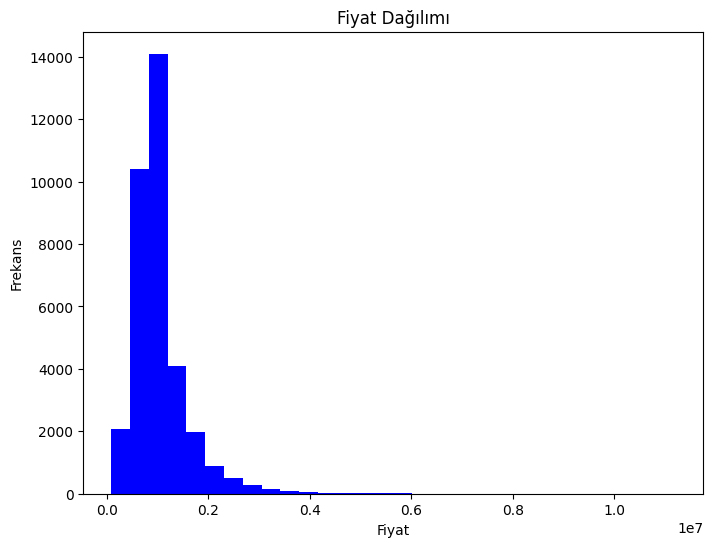

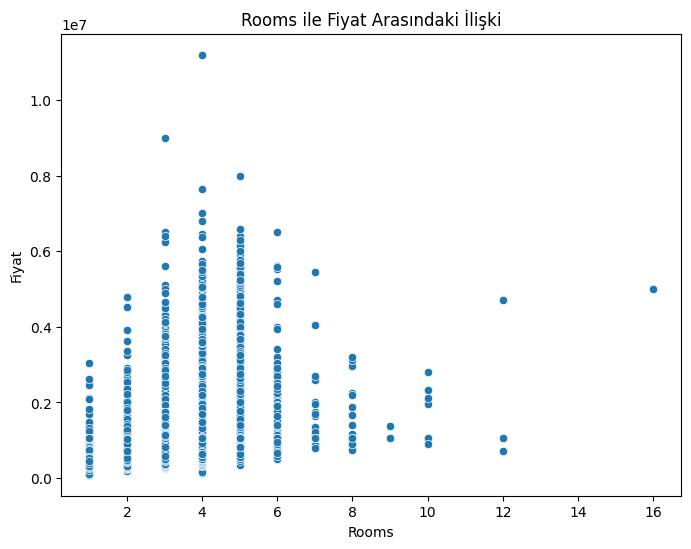

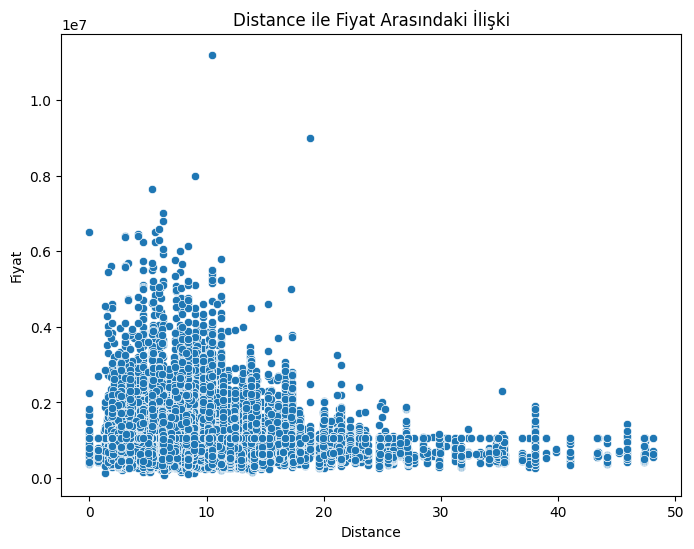

<ipython-input-48-3c147509518a>:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


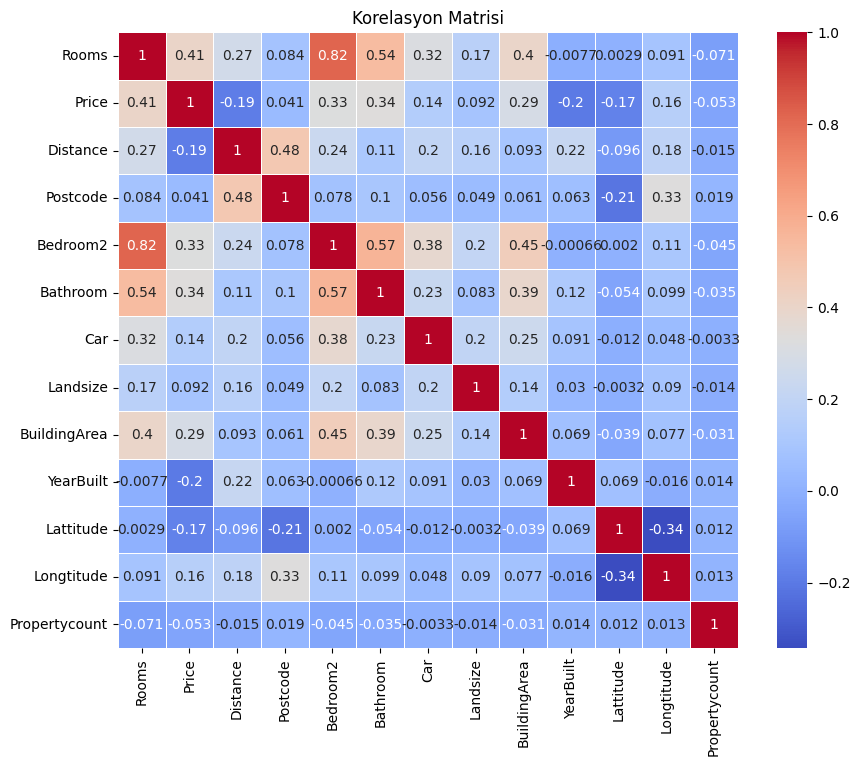

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(data['Price'], bins=30, color='blue')
plt.title("Fiyat Dağılımı")
plt.xlabel("Fiyat")
plt.ylabel("Frekans")
plt.show()

import seaborn as sns

# Örnek olarak iki sayısal sütun seçelim (örneğin, 'Rooms' ve 'Distance')
numerical_columns = ['Rooms', 'Distance']

for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=column, y='Price')
    plt.title(f"{column} ile Fiyat Arasındaki İlişki")
    plt.xlabel(column)
    plt.ylabel("Fiyat")
    plt.show()
# Korelasyon matrisini hesaplayın
correlation_matrix = data.corr()

# Korelasyon matrisini görselleştirin
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Korelasyon Matrisi")
plt.show()


In [51]:
from sklearn.metrics import mean_squared_error, r2_score

# Bağımsız değişkenler (X) ve bağımlı değişken (y) seçimi
X = data[['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']]
y = data['Price']

# Verilerinizi eğitim ve test kümelerine bölin
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lineer regresyon modelini oluşturun ve eğitin
model = LinearRegression()
model.fit(X_train, y_train)

# Modeli kullanarak tahminler yapın
y_pred = model.predict(X_test)

# Model performansını değerlendirin
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Ortalama Kare Hata (MSE):", mse)
print("R-kare (R2) değeri:", r2)

# Model katsayıları
print("Model Katsayıları:")
for feature, coef in zip(X.columns, model.coef_):
    print(feature, ":", coef)

# Modelin intercept (kesim noktası) değeri
print("Intercept (Kesim Noktası) Değeri:", model.intercept_)

Ortalama Kare Hata (MSE): 218633485373.98346
R-kare (R2) değeri: 0.31403664501217843
Model Katsayıları:
Rooms : 193656.7998140141
Distance : -24012.708006966463
Bathroom : 127844.78898681169
Car : 19018.409059963713
Landsize : 68.37421027430901
BuildingArea : 1311.3253338597906
YearBuilt : -3628.3553527087797
Intercept (Kesim Noktası) Değeri: 7396508.795174307


In [55]:
# Bağımsız değişkenler (X) ve bağımlı değişken (y) seçimi
X = data[['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']]
y = data['Price']

# Verilerinizi eğitim ve test kümelerine bölin
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model dictionary'sini tanımlayın
models = {
    'Lasso': {
        'model': Lasso()
    },
    'LinearRegression': {
        'model': LinearRegression()
    },
    'Ridge': {
        'model': Ridge()
    },
    'ElasticNet': {
        'model': ElasticNet()
    },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor()
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor()
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor()
    },
    'AdaBoostRegressor': {
        'model': AdaBoostRegressor(n_estimators=5, learning_rate=1.2, loss='exponential', random_state=2)
    }
}

# Modelleri eğitin ve performanslarını değerlendirin
for model_name, model_params in models.items():
    model = model_params['model']
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print("Ortalama Kare Hata (MSE):", mse)
    print("R-kare (R2) değeri:", r2)
    print("\n")

Model: Lasso
Ortalama Kare Hata (MSE): 218633511862.57462
R-kare (R2) değeri: 0.31403656190412754


Model: LinearRegression
Ortalama Kare Hata (MSE): 218633485373.98346
R-kare (R2) değeri: 0.31403664501217843


Model: Ridge
Ortalama Kare Hata (MSE): 218633488125.73975
R-kare (R2) değeri: 0.3140366363785331


Model: ElasticNet
Ortalama Kare Hata (MSE): 225050416230.6533
R-kare (R2) değeri: 0.29390350112693764


Model: KNeighborsRegressor
Ortalama Kare Hata (MSE): 235408597020.37726
R-kare (R2) değeri: 0.2614046712522027


Model: RandomForestRegressor
Ortalama Kare Hata (MSE): 194165301925.08704
R-kare (R2) değeri: 0.39080565951310064


Model: GradientBoostingRegressor
Ortalama Kare Hata (MSE): 186689156127.7616
R-kare (R2) değeri: 0.4142620941243823


Model: AdaBoostRegressor
Ortalama Kare Hata (MSE): 241834736966.1047
R-kare (R2) değeri: 0.24124263381657285




In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Modellerin tahminlerini alın
predictions = {}
for model_name, model_params in models.items():
    model = model_params['model']
    y_pred = model.predict(X_test)
    predictions[model_name] = y_pred

# Değerlendirme metriklerini hesaplayın
evaluation_metrics = {}
for model_name, y_pred in predictions.items():
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    evaluation_metrics[model_name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

# Modelleri değerlendirme metriklerine göre sıralayın
sorted_models = sorted(evaluation_metrics.items(), key=lambda x: x[1]['MSE'])

# En iyi performans gösteren modeli seçin
best_model = sorted_models[0]

# Sonuçları yazdırın
for model_name, metrics in evaluation_metrics.items():
    print(f"Model: {model_name}")
    print(f"MAE: {metrics['MAE']}")
    print(f"MSE: {metrics['MSE']}")
    print(f"RMSE: {metrics['RMSE']}")
    print(f"R2: {metrics['R2']}")
    print("\n")

print("En İyi Performans Gösteren Model:")
print(f"Model: {best_model[0]}")
print(f"MAE: {best_model[1]['MAE']}")
print(f"MSE: {best_model[1]['MSE']}")
print(f"RMSE: {best_model[1]['RMSE']}")
print(f"R2: {best_model[1]['R2']}")


Model: Lasso
MAE: 313735.5214026104
MSE: 218633511862.57462
RMSE: 467582.625706489
R2: 0.31403656190412754


Model: LinearRegression
MAE: 313735.6506063222
MSE: 218633485373.98346
RMSE: 467582.5973814503
R2: 0.31403664501217843


Model: Ridge
MAE: 313735.13417014654
MSE: 218633488125.73975
RMSE: 467582.6003239853
R2: 0.3140366363785331


Model: ElasticNet
MAE: 313500.6853888195
MSE: 225050416230.6533
RMSE: 474394.78942190466
R2: 0.29390350112693764


Model: KNeighborsRegressor
MAE: 314279.0213887395
MSE: 235408597020.37726
RMSE: 485189.238360021
R2: 0.2614046712522027


Model: RandomForestRegressor
MAE: 280598.853903563
MSE: 194165301925.08704
RMSE: 440641.9202993367
R2: 0.39080565951310064


Model: GradientBoostingRegressor
MAE: 286887.0642705986
MSE: 186689156127.7616
RMSE: 432075.40560388484
R2: 0.4142620941243823


Model: AdaBoostRegressor
MAE: 355436.61924981145
MSE: 241834736966.1047
RMSE: 491766.95391832164
R2: 0.24124263381657285


En İyi Performans Gösteren Model:
Model: Gradi